WESTERN GOVERNOR'S UNIVERSITY 
COLLEGE OF IT
D-209 DATA MINING I
TASK 2: PREDICTIVE ANALYSIS

BY PAOLA WILLIAMS

Table of Contents

A1. Proposal of question

A2. Defined goal

B1. Explanation of prediction method

B2. Summary of method assumption

B3. Packages or libraries list

C1. Data preprocessing

C2. Data set variables

C3. Steps for analysis

C4. Cleaned data set

D1. Splitting the data 

D2. Output and intermediate calculations

D3. Code execution

E1. Accuracy and MSE

E2. Results and implications

E3. Limitation

E4. Course of action

F. Panopto recording

G. Sources for third-party code

H. Sources 

I. Professional Communication

A1. Proposal of question

Predict whether or not customers will discontinue services at the company.

A2. Defined goal

-Predict customers' churning outcome, either Yes or No, in a binary format.

B1. Explanation of classification method

The classification method chosen is Decision Tree, a supervised learning method used for classification and regression that will predict the response variable's outcome by learning decision rules coming from the properties of the data. A decision tree is a flowchart-type structure where each internal node (nonleaf node) indicates a test on a variable, each branch denotes an outcome of the test, and each leaf node expresses a class label.

This method will use an algorithm to decide to split all our predictor variables (Children, Age, Tenure, etc) into two or more sub-nodes until all the labels are separated to the fullest purity(Roaj, 2020). For example, in order to make predictions, our model would ask questions on each variable. One question could be, How many children does the customer have?, or Are they techie? Once the training is finished, it returns a decision tree that can predict optimal categorizations.

In this case, the algorithm will take the churn dataset and will predict if a customer will churn or not in terms of 1 or 0.

B2. Summary of method assumption

One of the decision tree assumptions is that all training data is passed to the root node. The training data is used to train the model so it can make predictions on the test data(Punia).

B3. Packages or libraries list

Python is the programming language used to create the Decision Tree model for our dataset. The packages to be used are:

- DecisionTreeClassifier to create the model. 

- Train_test_split to split the data into the training and testing sets

- Confusion matrix package 

- Accuracy score package

C1. Data preparation

We will identity and treat nulls and outliers to clean our dataset and prepare it for the decision tree model.


C2. Data set variables

In this study, the response variable is Churn. We will use the most relevant predictor variables and remove those that are not significant to predicting customers' churning. The continuous predictor variables chosen are:
'Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year'.

The categorical predictor variables are:
'State','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod'.

In [270]:
%pip install --upgrade pip
%pip install -- pydotplus 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [271]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from itertools import product
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [272]:
df = pd.read_csv(r"C:\Users\paowm\Downloads\churn_clean.csv")

In [273]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [274]:
df = df[['Population','State', 'Area','Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year']]

We can see below the summary statistics of the numerical variables in the dataset. 

In [275]:
df.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


C3. Steps for analysis

1. Data cleaning: Detecting and cleaning Nulls

In [276]:
df.isnull().sum()

Population              0
State                   0
Area                    0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

2. Detecting and treating outliers

In [277]:
df['Z_Score_Children']=stats.zscore(df['Children'])
sum(df.Z_Score_Children > 3)

191

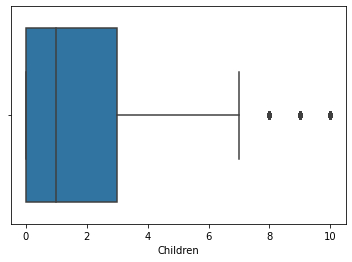

In [278]:
c =sns.boxplot(x='Children', data=df)

In [279]:
df['Children'] = np.where(df['Z_Score_Children'] > 3, df['Children'].median(), df['Children'])
df['Z_Score_Children']=stats.zscore(df['Children'])

In [280]:
df['Z_Score_Age']=stats.zscore(df['Age'])
sum((df.Z_Score_Age < -3) | (df.Z_Score_Age > 3))

0

In [281]:
df['Z_Score_Income']=stats.zscore(df['Income'])
sum((df.Z_Score_Income < -3) | (df.Z_Score_Income > 3))

145

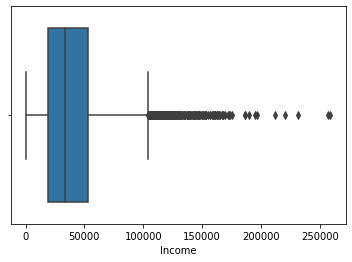

In [282]:
c =sns.boxplot(x='Income', data=df)

In [283]:
df['Income'] = np.where(df['Z_Score_Income'] > 3, df['Income'].median(), df['Income'])
df['Z_Score_Income']=stats.zscore(df['Income'])

In [284]:
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])
sum((df.Z_Score_Outage_sec_perweek< -3) | (df.Z_Score_Outage_sec_perweek > 3))

28

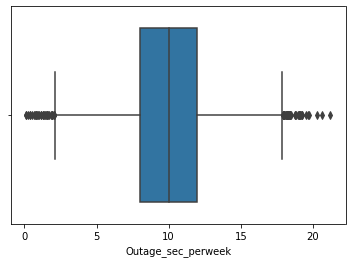

In [285]:
c =sns.boxplot(x='Outage_sec_perweek', data=df)

In [286]:
sum(df.Z_Score_Outage_sec_perweek > 3)

15

In [287]:
df['Outage_sec_perweek'] = np.where(df['Z_Score_Outage_sec_perweek'] > 3, df['Outage_sec_perweek'].median(), df['Outage_sec_perweek'])
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])

In [288]:
sum(df.Z_Score_Outage_sec_perweek < -3)

13

In [289]:
df['Outage_sec_perweek'] = np.where(df['Z_Score_Outage_sec_perweek'] < -3, df['Outage_sec_perweek'].median(), df['Outage_sec_perweek'])
df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])

In [290]:
df['Z_Score_Email']=stats.zscore(df['Email'])
sum((df.Z_Score_Email < -3) | (df.Z_Score_Email > 3))

12

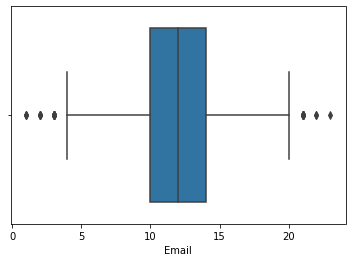

In [291]:
c =sns.boxplot(x='Email', data=df)

In [292]:
sum(df.Z_Score_Email < -3)

9

In [293]:
df['Email'] = np.where(df['Z_Score_Email'] < -3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [294]:
sum(df.Z_Score_Email > 3)

3

In [295]:
df['Email'] = np.where(df['Z_Score_Email'] > 3, df['Email'].median(), df['Email'])
df['Z_Score_Email']=stats.zscore(df['Email'])

In [296]:
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])
sum(df.Z_Score_Contacts > 3)

165

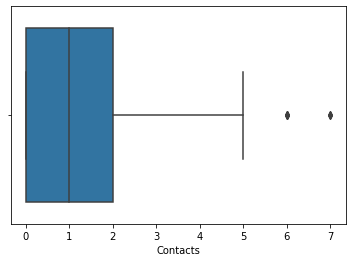

In [297]:
c =sns.boxplot(x='Contacts', data=df)

In [298]:
df['Contacts'] = np.where(df['Z_Score_Contacts'] > 3, df['Contacts'].median(), df['Contacts'])
df['Z_Score_Contacts']=stats.zscore(df['Contacts'])

In [299]:
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])
sum((df.Z_Score_Yearly_equip_failure < -3) | (df.Z_Score_Yearly_equip_failure > 3))

94

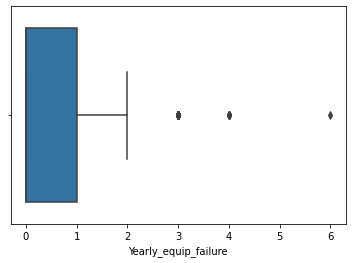

In [300]:
c =sns.boxplot(x='Yearly_equip_failure', data=df)

In [301]:
df['Yearly_equip_failure'] = np.where(df['Z_Score_Yearly_equip_failure'] > 3, df['Yearly_equip_failure'].median(), df['Yearly_equip_failure'])
df['Z_Score_Yearly_equip_failure']=stats.zscore(df['Yearly_equip_failure'])

In [302]:
df['Z_Score_Tenure']=stats.zscore(df['Tenure'])
sum((df.Z_Score_Tenure < -3) | (df.Z_Score_Tenure > 3))

0

In [303]:
df['Z_Score_Monthly_Charge']=stats.zscore(df['MonthlyCharge'])
sum((df.Z_Score_Monthly_Charge < -3) | (df.Z_Score_Monthly_Charge> 3))

0

In [304]:
df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
sum((df.Z_Score_Bandwidth_GB_Year< -3) | (df.Z_Score_Bandwidth_GB_Year> 3))

0

In [305]:
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

3. Replace Churn outomes into 0 and 1

In [306]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df['Churn'].value_counts()

0    7350
1    2650
Name: Churn, dtype: int64

In [307]:
df = df.drop(columns=['Z_Score_Children','Z_Score_Age','Z_Score_Income','Z_Score_Outage_sec_perweek','Z_Score_Email', 'Z_Score_Contacts', 'Z_Score_Yearly_equip_failure', 'Z_Score_Tenure','Z_Score_Monthly_Charge', 'Z_Score_Monthly_Charge','Z_Score_Bandwidth_GB_Year'])

In [308]:
df.describe()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,1.925000,53.078400,38151.157582,0.265000,9.999841,12.022200,0.940800,0.368800,34.526188,172.624816,3392.341550
std,14432.698671,1.883383,20.698882,24850.801431,0.441355,2.933317,3.004565,0.891614,0.578464,26.443063,42.943094,2185.294852
min,0.000000,0.000000,18.000000,348.670000,0.000000,1.144796,3.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.000000,35.000000,19224.717500,0.000000,8.033911,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.000000,53.000000,33169.742500,0.000000,10.018270,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.000000,71.000000,51669.637500,1.000000,11.955480,14.000000,1.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,8.000000,89.000000,124025.100000,1.000000,18.851730,21.000000,3.000000,2.000000,71.999280,290.160419,7158.981530


In [309]:
df.dtypes

Population                int64
State                    object
Area                     object
Children                float64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                     int64
Outage_sec_perweek      float64
Email                   float64
Contacts                float64
Yearly_equip_failure    float64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
PaymentMethod            object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: o

C4. Cleaned data set

After treating the outliers, we will save the dataset into a csv file

In [310]:
df.to_csv(r'C:\Users\paowm\clean_churn_data.csv', index = None, header=True)

4. Convert categorical variables into dummy variables

In [337]:
dummy_variables = ['State','Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet','InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

dummy_data = pd.get_dummies(df, prefix=dummy_variables, columns=dummy_variables, drop_first= True)
y = dummy_data['Churn_1']
dummy_data.drop(columns=['Churn_1'], inplace=True)
sc = StandardScaler()

5. Standardized numerical variables

In [338]:
to_transform = ['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']

dummy_data.loc[:,to_transform] = sc.fit_transform(dummy_data.loc[:,to_transform])

D1. Splitting the data

We will split the dataset into training and testing sets, where 70% of the data will be assigned for training and 30% for testing.

In [339]:
X_train, X_test, y_train, y_test = train_test_split(dummy_data,y,test_size=.3, random_state=0)

D2. Output and intermediate calculations

After splitting the dataset, we will do the following:

- Create a DecisionTreeClassifier object. We will use 4 as max_depth to avoid overfitting of the model.

- Use the .fit function to fit the training data into the model

- Run the .get_params function to retrieve the model parameters

- Apply the .predict function to produce the predictions with the testing set

- Create the confusion matrix

- Calculate the accuracy score

- Print the tree structure

D3. Code execution

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Confusion Matrix 
 [[2086  115]
 [ 406  393]]
Accuracy Score:  0.8263333333333334


C:\Users\paowm\AppData\Local\Temp/ipykernel_28272/4292764760.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


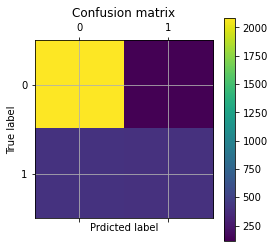

In [340]:
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)

print('Confusion Matrix \n', confusion_matrix(y_test,y_pred))
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

plt.matshow(confusion_matrix(y_test, y_pred))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Prdicted label')
plt.grid(b=None)
plt.show()


0 1


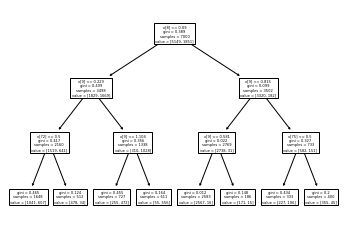

In [362]:
from sklearn import tree
tree.plot_tree(model.fit(X_train, y_train))
print(y_train[0], y_train[1])

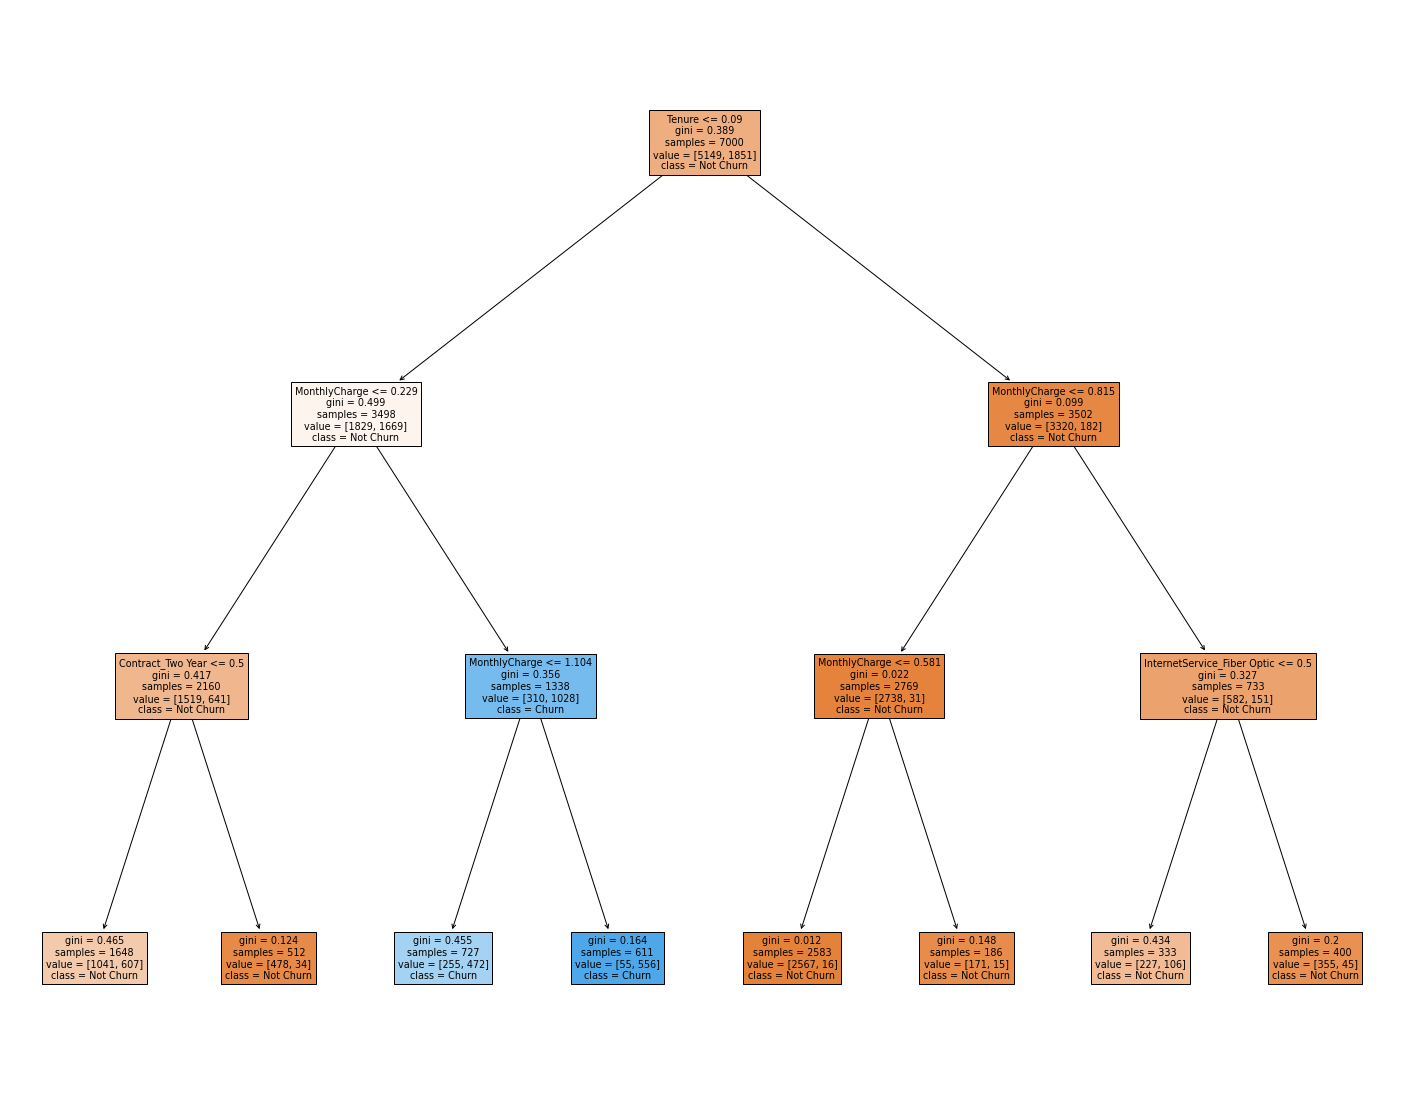

In [367]:
clf = DecisionTreeClassifier(max_depth = 3)
model = clf.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=dummy_data.columns,  
                   class_names=['Not Churn', 'Churn'],
                   filled=True
                   )

E1. Accuracy and MSE

In [368]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.17366666666666666

To evaluate the accuracy of the model, we will use the accuracy score calculated between the predicted values and the actual ones and the MSE.

The accuracy score is 83% which indicates it is good at predicting the values.

We use the Mean Squared Error to evaluate the decision tree model by calculating the difference between the predicted and the actual values (Allwright,2022). This evaluation metric squares the error, so the larger errors are minimized. The closer the MSE to 0 the more accurate the model is. In this case, the MSE resulted in 0.17 hence we can say the model is accurate at predicting the outcome values.


E2. Results and implications

The variables to split on max_depth = 3 are shown in the visualization. 

The first variable that has been used to split the tree is Tenure <= 0.09. If this condition is met, then we go to the left branch which is MonthlyCharge <= 0.229. If Tenure is > 0.09 then we go to the branch on the right which would be MonthlyCharge <= 0.815.

The measure for the split is gini. In the root, Tenure <= 0.09, gini equals 0.389. The closer to 0, the les impurity there is in the node.

We have 7000 samples entering this node before any splits.

The "value" section shows us that there are 5149 not churn and 1851 churned customers. 

"Not Churn" is the class label on the first node, but the only class labels that are relevant, are those that are in the pure leaf nodes, i.e, the nodes with no more splits. For example, the leaf node on the far left has "Not Churn". This means that there are more Not churning customers than churning customers in that leaf node.

For each sample, we go through the entire tree until we get to the leaf nodes to make the predictions of our test dataset.

E3. Limitation

One of the limitations of this model is that a decision tree model can easily overfit if we do not set up the right parameters, hereby creating complex decision rules. We can "prune" the model but the effectiveness might be compromised (2022).

E4. Course of action

To avoid churn, the company should focus on those customers that are more likely to churn. They can improve their customer experience and offer discounts to avoid them leaving the company looking for better services, prices, customer service, etc.

F. Panopto video

H. Sources of third-party code

Robinson, S. (n.d.). Stack Abuse. Retrieved from Decision Trees in Python with Scikit-Learn: https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

DUTTA, G. (2020, August 22). Kaggle. Retrieved from Telecom Churn Case Study with Decision Tree: https://www.kaggle.com/code/gauravduttakiit/telecom-churn-case-study-with-decision-tree

I. Sources

Allwright, S. (2022, August 26). Stephen Allwright. Retrieved from https://stephenallwright.com/interpret-mse/

Analtix Labs. (2022, October 1). Retrieved from Decision Tree Algorithm in Machine Learning: Advantages, Disadvantages, and Limitations: https://www.analytixlabs.co.in/blog/decision-tree-algorithm/

How to Calculate Mean Squared Error in Python. (2022, January 10). Retrieved from https://datagy.io/mean-squared-error-python/

K, D. (2019, May 26). Medium. Retrieved from Top 5 advantages and disadvantages of Decision Tree Algorithm: https://dhirajkumarblog.medium.com/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a